# CUSTOMER SEGMENTATION PROJECT

## WHAT IS CUSTOMER SEGMENTATION? 

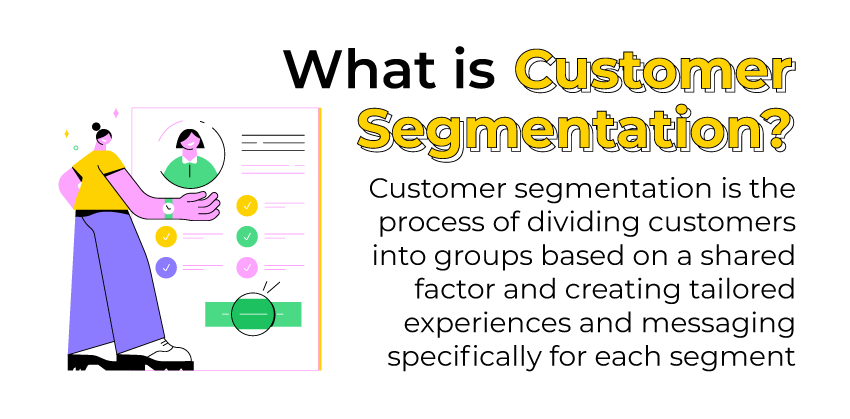

## 7 BENEFITS OF CUSTOMER SEGMENTATION 

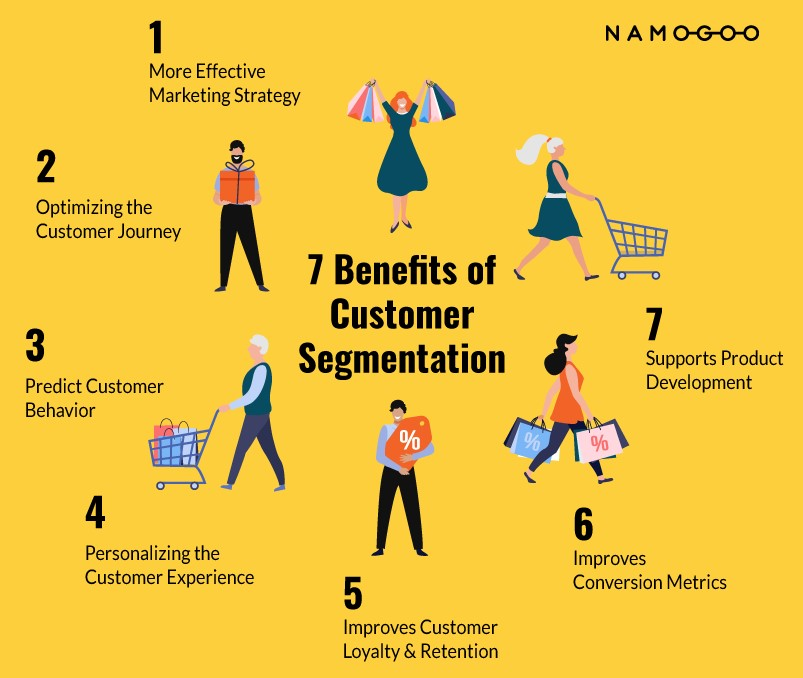 

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import plotly as py
import plotly.graph_objs as go

from sklearn.cluster import KMeans
from sklearn.neighbors import BallTree

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input")) 

#### Load Dataset

Data setinde; musterilere ait ID numaralari,cinsiyet, yas, yillik gelir, 1-100 arasinda musterinin yaptigi harcamalarin skorlamasi var. Skorlari dusuk olanlar az harcama yapan, yuksek olanlar cok harcama yapan musteriler. 

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head() 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape 

(200, 5)

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [6]:
df.isnull().any().any() 

False

In [7]:
df.duplicated().any() 

False

#### Explore Data

You can rename columns to more usable, if you need.

---
---

In [8]:
df.rename(columns={
    'CustomerID': 'ID',
    'Annual Income (k$)': 'Annual Income',
    'Spending Score (1-100)': 'Spending Score'
}, inplace=True) 

df.columns 

Index(['ID', 'Gender', 'Age', 'Annual Income', 'Spending Score'], dtype='object')

## Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





### Histogram Analysis 

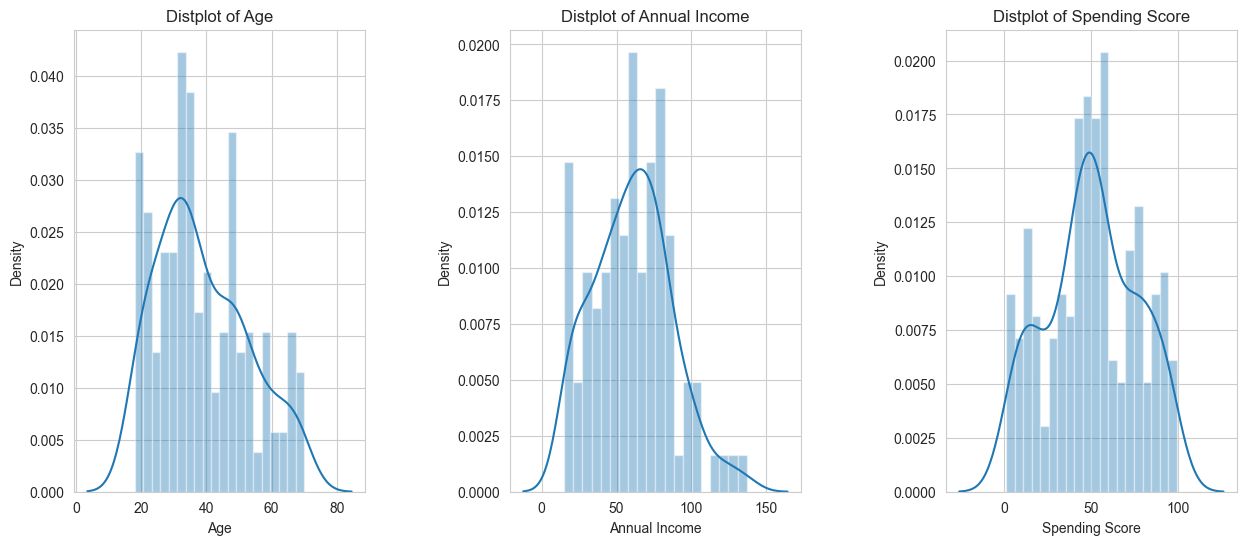

In [9]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income' , 'Spending Score']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show() 

### Counts of Gender 

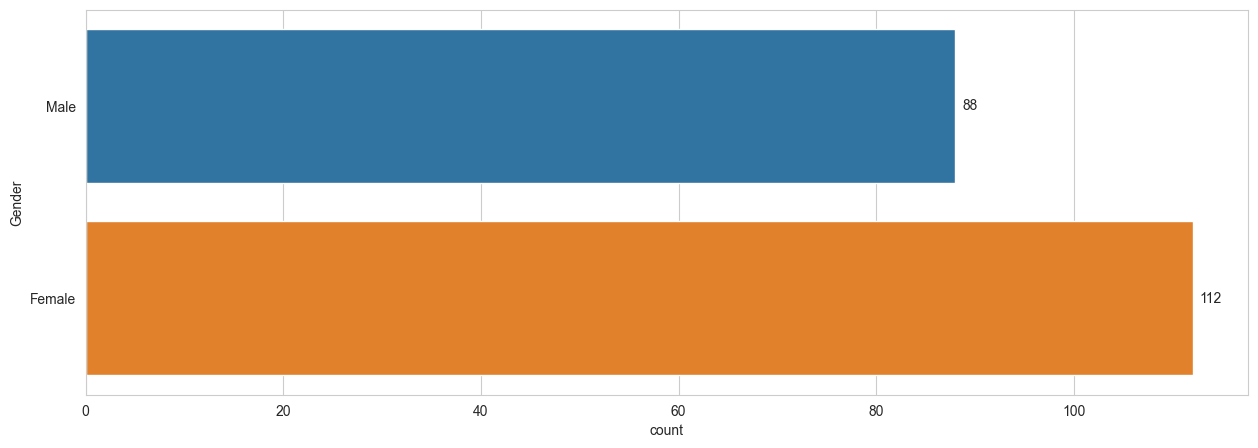

In [10]:
plt.figure(1, figsize=(15, 5))
ax = sns.countplot(y='Gender', data=df)

# Annotate each bar with its count value
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.show() 

### Relation between Age, Annual Income and Spending Score 

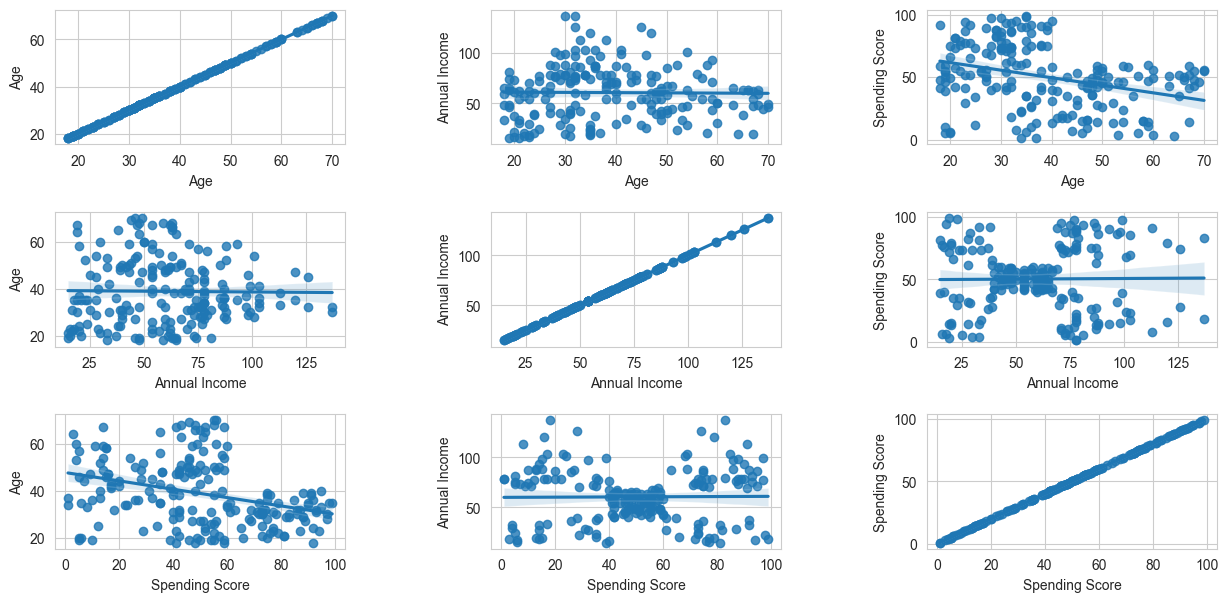

In [11]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income' , 'Spending Score']:
    for y in ['Age' , 'Annual Income' , 'Spending Score']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show() 

### The Relation between Age and Annual Income Concerning Gender 

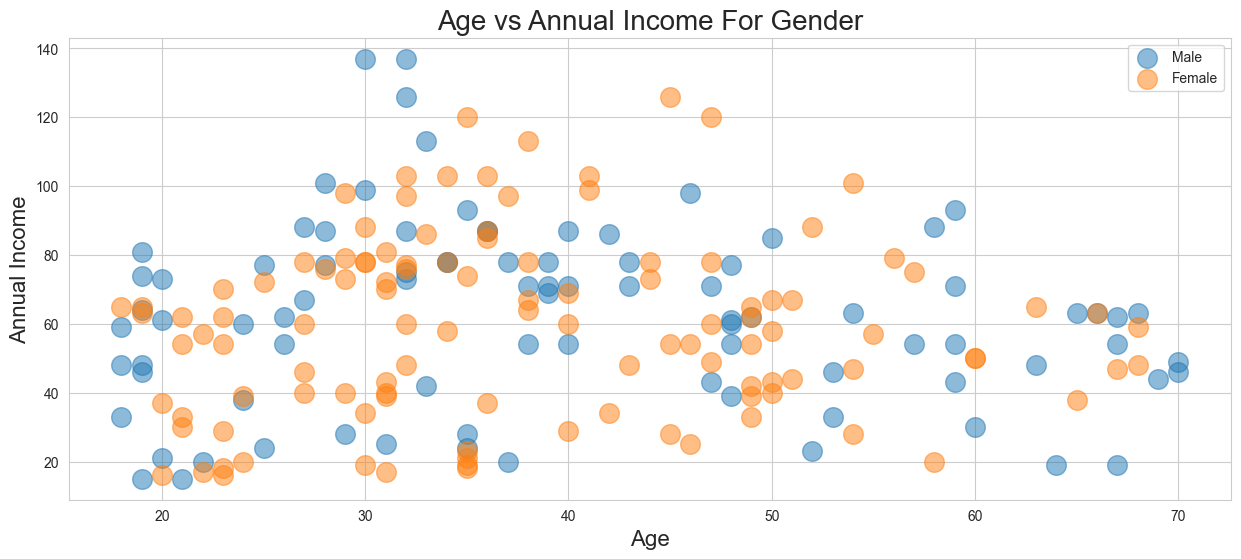

In [12]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age', fontsize = 16), plt.ylabel('Annual Income', fontsize = 16) 
plt.title('Age vs Annual Income For Gender', fontsize = 20)
plt.legend()
plt.show()  

### The Relation between Spending Score and Annual Income Concerning Gender 

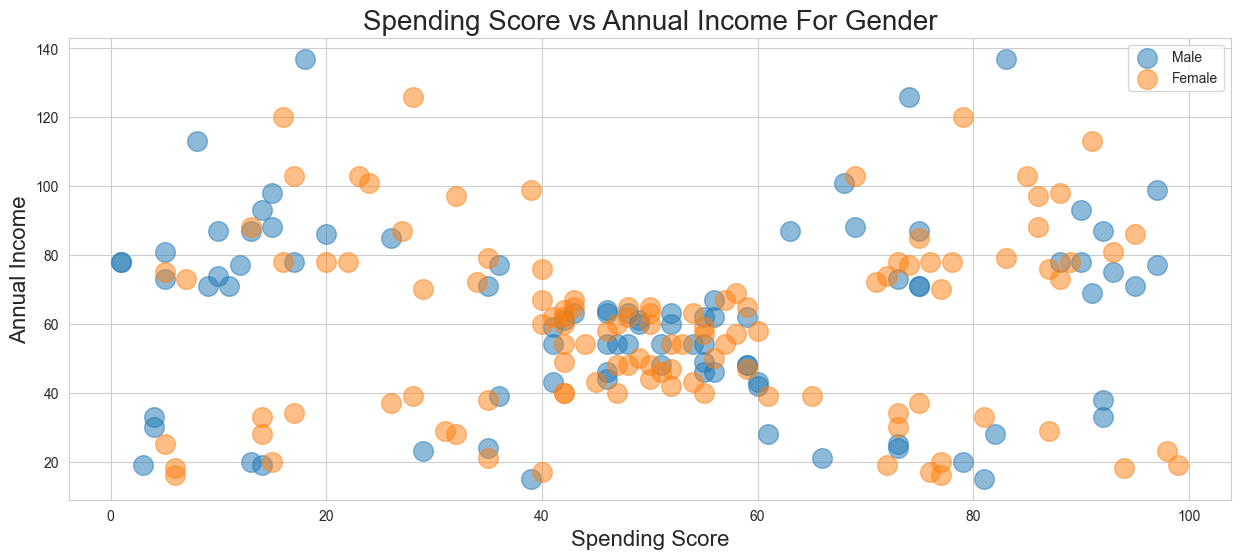

In [13]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Spending Score' , y = 'Annual Income' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Spending Score', fontsize = 16), plt.ylabel('Annual Income', fontsize = 16) 
plt.title('Spending Score vs Annual Income For Gender', fontsize = 20)
plt.legend()
plt.show()  

### Distribution Age, Annual Income and Spending Score Concerning Gender 

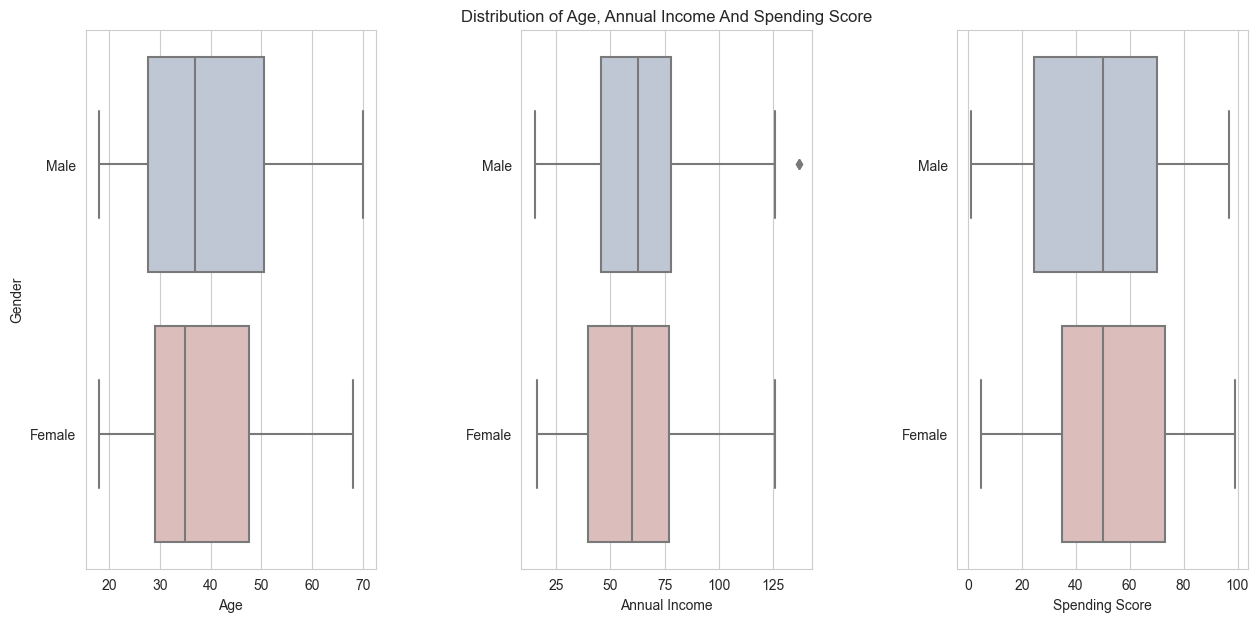

In [14]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income' , 'Spending Score']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.boxplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Distribution of Age, Annual Income And Spending Score' if n == 2 else '')
plt.show()  

### The Relation Annual Income and Spending Score 

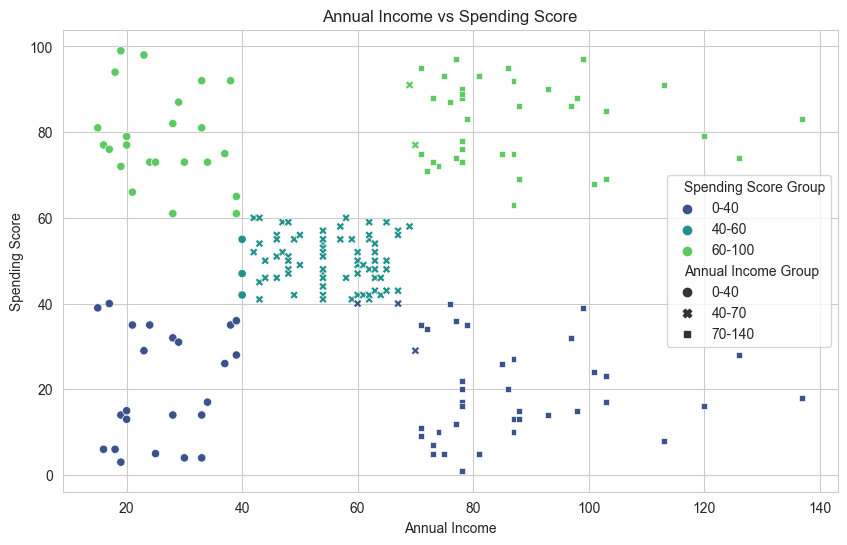

In [15]:
# Create custom Spending Score groups
df['Spending Score Group'] = pd.cut(df['Spending Score'], bins=[0, 40, 60, 100], labels=['0-40', '40-60', '60-100'])

# Create custom Annual Income groups
df['Annual Income Group'] = pd.cut(df['Annual Income'], bins=[0, 40, 70, 140], labels=['0-40', '40-70', '70-140'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income', y='Spending Score', hue='Spending Score Group', style='Annual Income Group', data=df, palette='viridis', legend='full')
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show() 

**As shown in the graph, According to the Annual Income and Spending Score, there are five customer segments.** 

---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Hopkins Statistic of Clustering Tendency for K-Means 

**Hopkins test**

A statistical test which allow to guess if the data follow an uniform distribution. 

If the test is positve (an hopkins score which tends to 0) it means that the data is not uniformly distributed. 

Hence clustering can be useful to classify the observations. 

However, if the score is too high (above 0.3 for exemple); the data is uniformly distributed and clustering can’t be really useful for the problem at hand. 

In [16]:
def hopkins(data_frame, sampling_size):
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)

    # Select only numeric columns
    numeric_data_frame = data_frame.select_dtypes(include=[np.number])

    # Sample n observations from D: P
    if sampling_size > numeric_data_frame.shape[0]:
        raise Exception('The number of samples is bigger than the shape of D')
    data_frame_sample = numeric_data_frame.sample(n=sampling_size)

    # Get the distance to their nearest neighbors in D: X
    tree = BallTree(numeric_data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]

    # Randomly simulate n points with the same variation as in D: Q
    uniformly_selected_observations = np.random.uniform(
        numeric_data_frame.min(), numeric_data_frame.max(), (sampling_size, numeric_data_frame.shape[1])
    )
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)

    # Get the distance to their nearest neighbors in D: Y
    tree = BallTree(numeric_data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist

    # Return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]


In [17]:
X = df.copy() 

In [18]:
hopkins(X, X.shape[0]) 

0.16316559743414744

**Our Hopkins score is 0.16, which is smaller than 0.3, which shows us the data is not uniformly distributed, and clustering can be useful to classify the observations.**  

--------------------------

----------------------------

### Clustering based on Age and Spending Score - X1

#### *i. Create a new dataset with two variables of your choice*

In [19]:
'''Age and spending Score'''
X1 = df[['Age' , 'Spending Score']].iloc[: , :].values 

#### *ii. Determine optimal number of clusters*

In [20]:
ssd = []    # inertia  .. SSD, "Sum of Squared Distances" 

K = range(2,10)   

for k in K:                                          
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X1)
    ssd.append(model.inertia_) 

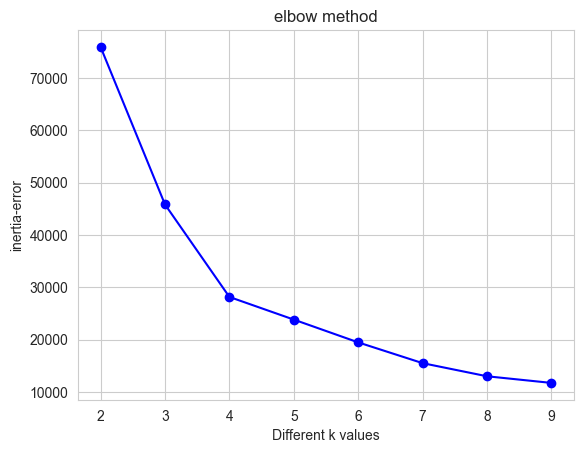

In [21]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 
plt.show() 

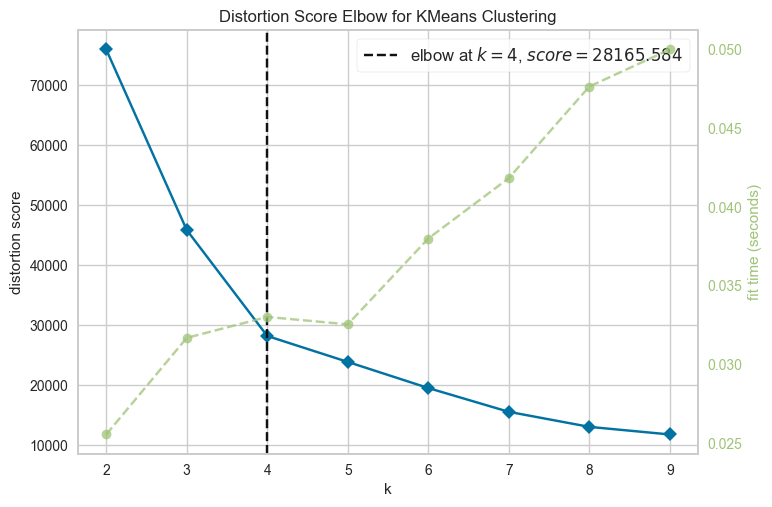

In [22]:
from yellowbrick.cluster import KElbowVisualizer   

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,10)) 

visualizer.fit(X1)        
visualizer.show(); 

### Silhouette_score 

In [23]:
from sklearn.metrics import silhouette_score 

range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}") 

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107


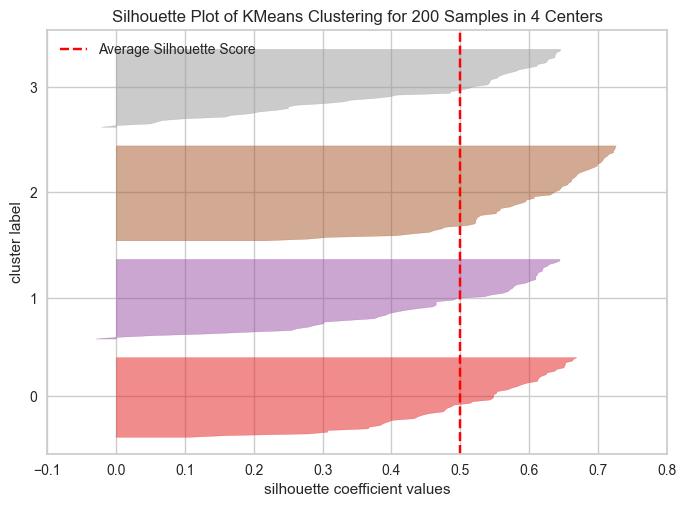

In [24]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model4 = KMeans(n_clusters=4, random_state=42)  
visualizer = SilhouetteVisualizer(model4)

visualizer.fit(X1)    # Fit the data to the visualizer
visualizer.poof(); 

#### *iii. Apply K Means*

In [25]:
model4 = KMeans(n_clusters =4, random_state=42)
model4.fit_predict(X1) 
labels1 = model4.labels_
centroids1 = model4.cluster_centers_ 

#### *iv. Visualizing and Labeling All the Clusters*

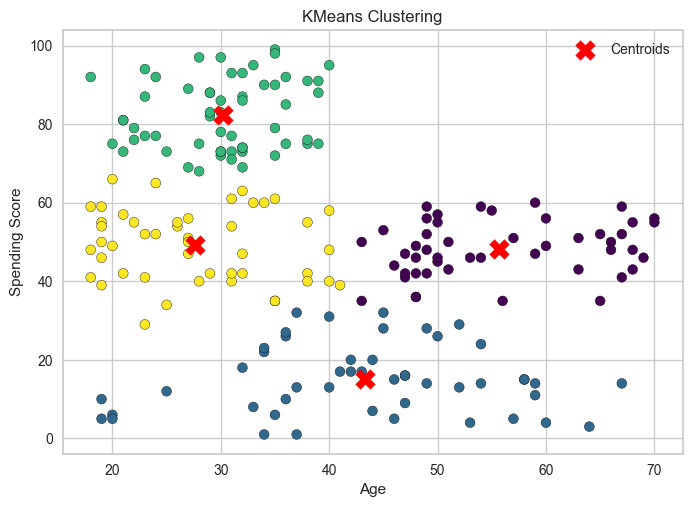

In [26]:
# Scatter plot
plt.scatter(X1[:, 0], X1[:, 1], c=labels1, cmap='viridis', edgecolor='k', s=50)
plt.scatter(model4.cluster_centers_[:, 0], model4.cluster_centers_[:, 1], s=200, marker='X', c='red', label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.show() 

In [27]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model4.predict(np.c_[xx.ravel(), yy.ravel()]) 

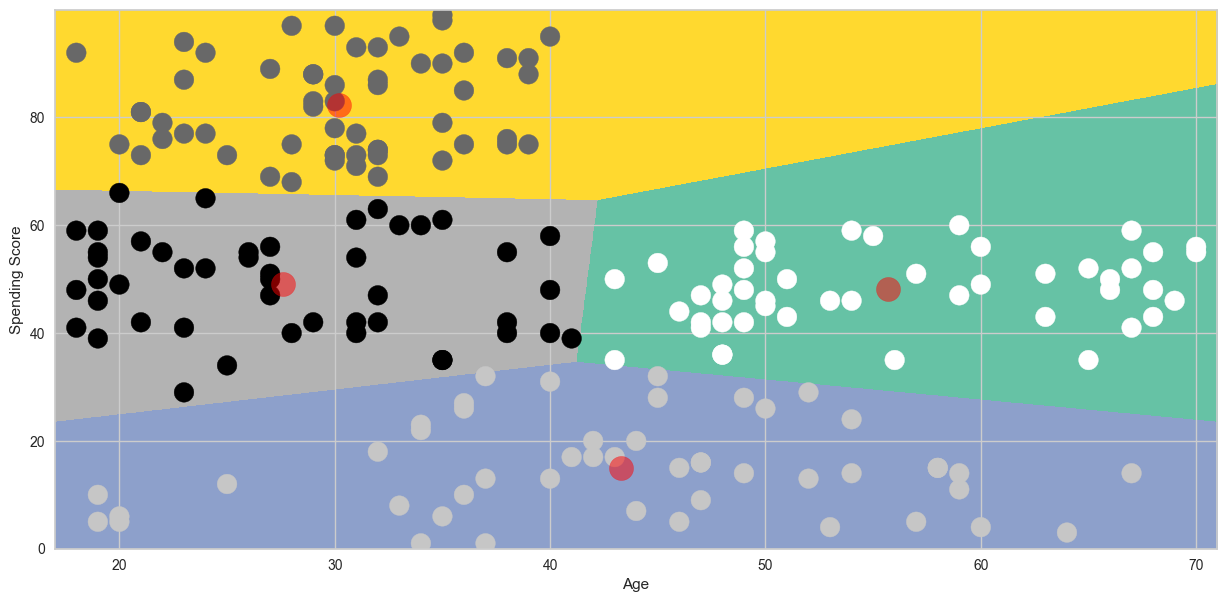

In [28]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Set2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score') , plt.xlabel('Age')
plt.show()  

### Clustering based on Annual Income and Spending Score - X2

#### *i. Create a new dataset with two variables of your choice*

In [29]:
'''Annual Income and spending Score'''
X2 = df[['Annual Income' , 'Spending Score']].iloc[: , :].values 

#### *ii. Determine optimal number of clusters*

In [30]:
ssd = []    # inertia  .. SSD, "Sum of Squared Distances" 

K = range(2,10)   

for k in K:                                          
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X2)
    ssd.append(model.inertia_) 

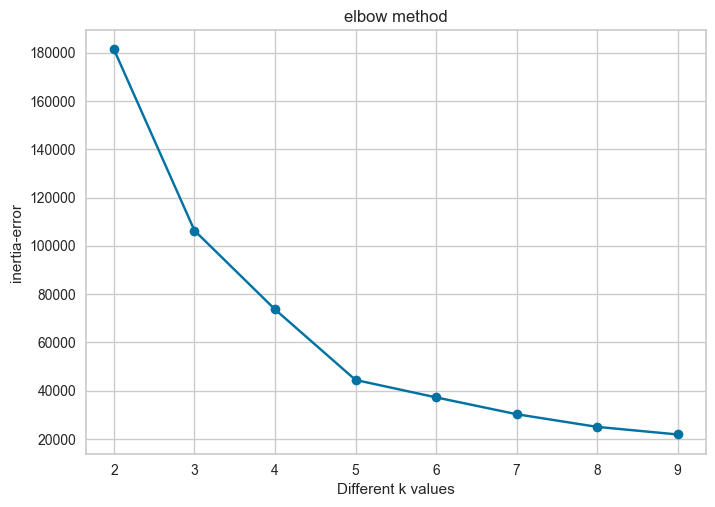

In [31]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 
plt.show() 

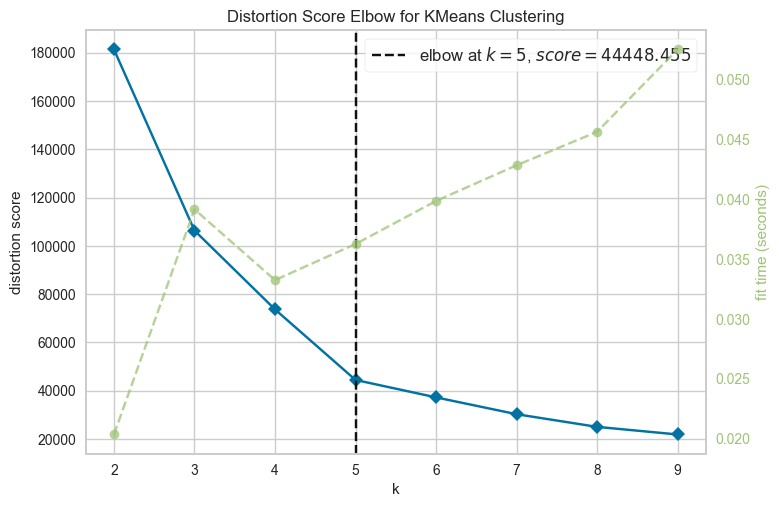

In [32]:
model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,10)) 

visualizer.fit(X2)        
visualizer.show(); 

### Silhouette_score 

In [33]:
range_n_clusters = range(2,9)

for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}") 

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5264283703685728
For n_clusters=8, the silhouette score is 0.45827056882053113


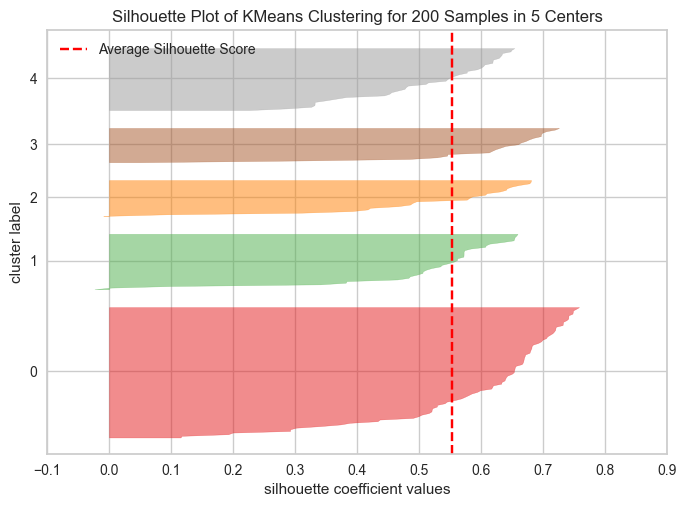

In [34]:
model5 = KMeans(n_clusters=5, random_state=42)  
visualizer = SilhouetteVisualizer(model5)

visualizer.fit(X2)    # Fit the data to the visualizer
visualizer.poof(); 

#### *iii. Apply K Means*

In [35]:
model5 = KMeans(n_clusters =5, random_state=42)
model5.fit_predict(X2) 
labels2 = model5.labels_
centroids2 = model5.cluster_centers_ 

#### *iv. Visualizing and Labeling All the Clusters* 

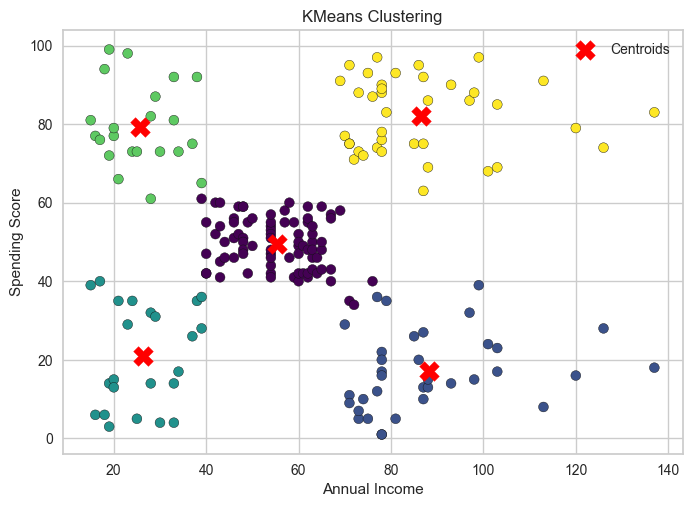

In [36]:
# Scatter plot
plt.scatter(X2[:, 0], X2[:, 1], c=labels2, cmap='viridis', edgecolor='k', s=50)
plt.scatter(model5.cluster_centers_[:, 0], model5.cluster_centers_[:, 1], s=200, marker='X', c='red', label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show() 

In [37]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = model5.predict(np.c_[xx.ravel(), yy.ravel()]) 

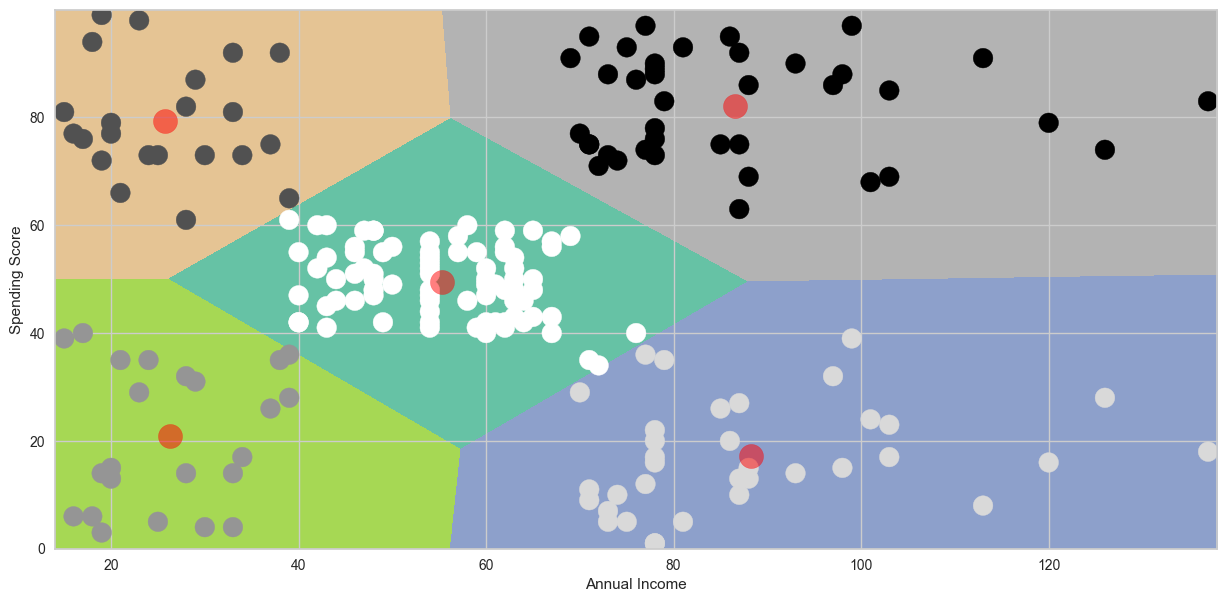

In [38]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Set2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income' ,y = 'Spending Score' , data = df , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score') , plt.xlabel('Annual Income')
plt.show() 

### Hierarchical Clustering

#### Clustering based on Age and Spending Score- X1 

#### *i. Determine optimal number of clusters using Dendogram* 

In [39]:
from scipy.cluster.hierarchy import dendrogram, linkage 

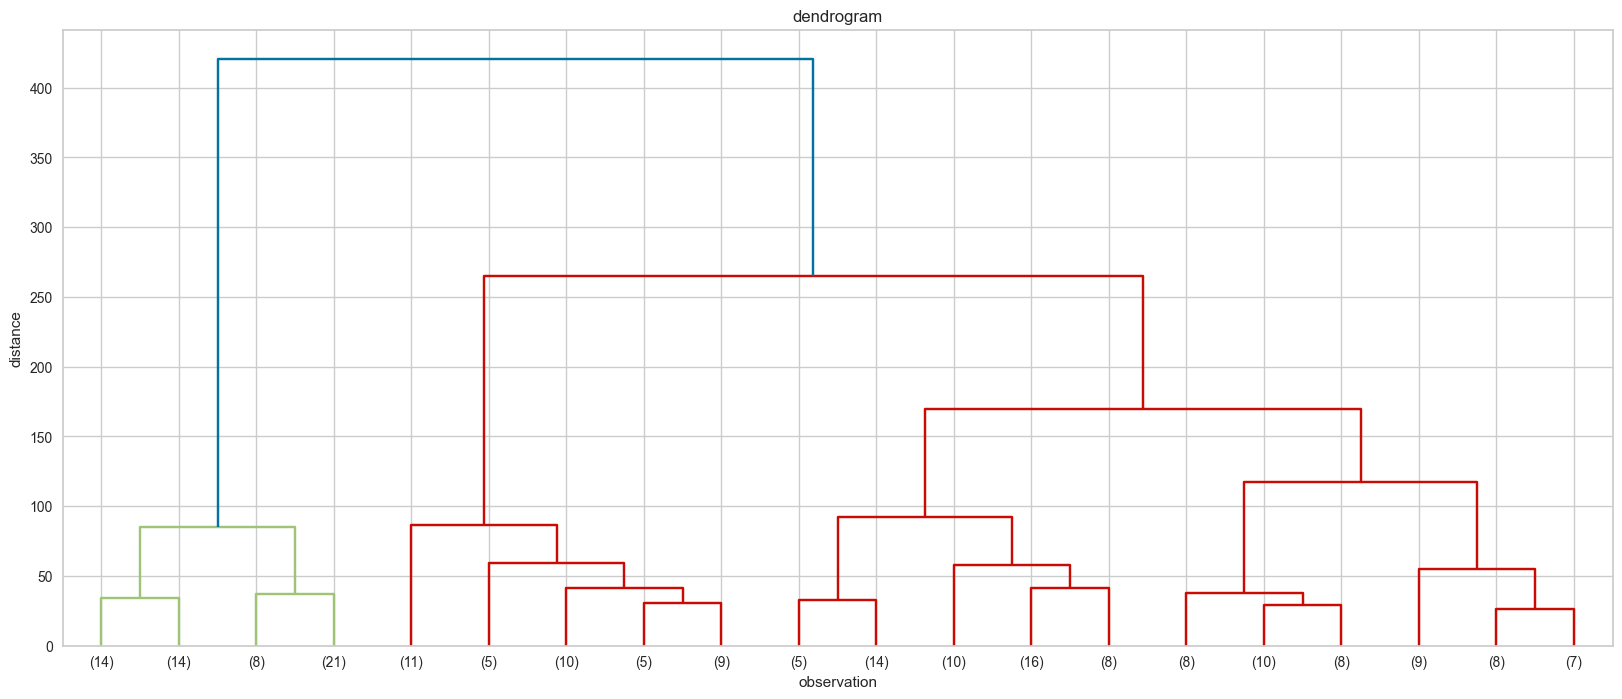

In [40]:
hc_ward = linkage (y= X1, method ="ward")

plt.figure(figsize= (20,8))
plt.title("dendrogram")
plt.xlabel("observation")
plt.ylabel("distance")
dendrogram (hc_ward, leaf_font_size=10, truncate_mode='lastp', p=20); 

####  *Apply Agglomerative Clustering* 

In [41]:
from sklearn.cluster import AgglomerativeClustering 

In [42]:
K= range (2,10)
for k in K:
    model =AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X1)
    print("f'Silhouette Score for",{k}, "clusters",{silhouette_score(X1, model.labels_)}) 

f'Silhouette Score for {2} clusters {0.4549465643222241}
f'Silhouette Score for {3} clusters {0.4411791686353356}
f'Silhouette Score for {4} clusters {0.4602496389565028}
f'Silhouette Score for {5} clusters {0.40374071753059787}
f'Silhouette Score for {6} clusters {0.4125958704145705}
f'Silhouette Score for {7} clusters {0.4158977524079244}
f'Silhouette Score for {8} clusters {0.3883688959732531}
f'Silhouette Score for {9} clusters {0.3948151533262091}


In [48]:
model4 =  AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage = "ward") 
labels_agglomerative = model4.fit_predict(X1) 

####  *Visualizing and Labeling All the Clusters* 

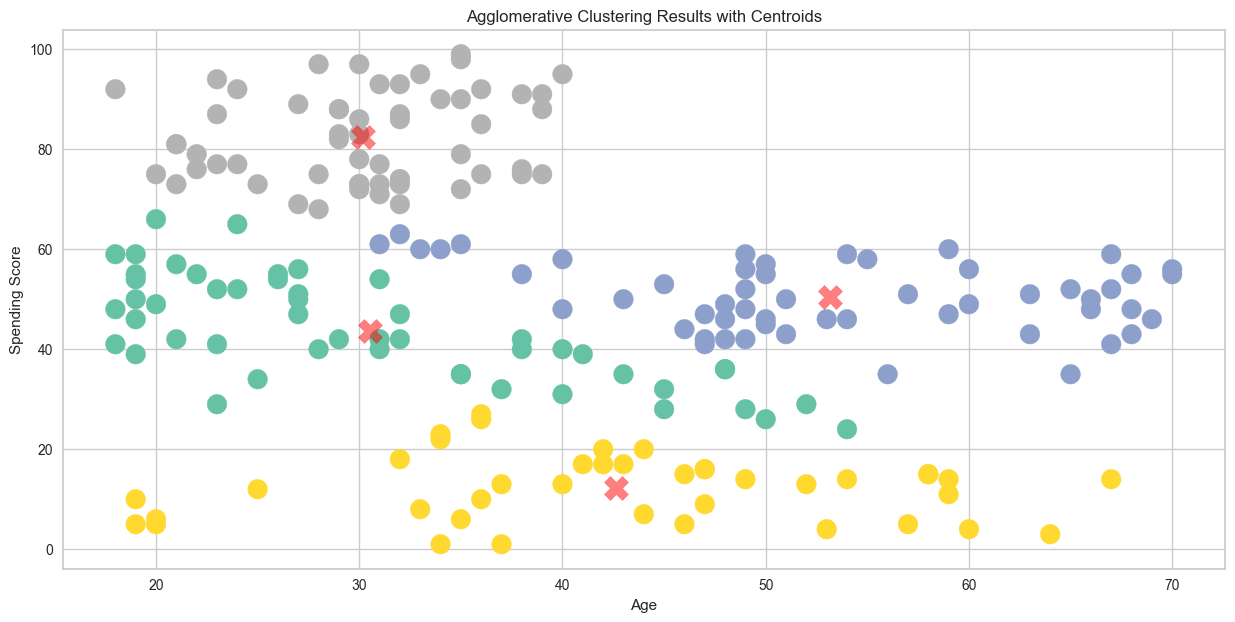

In [49]:
plt.figure(1, figsize=(15, 7))
plt.clf()

# Scatter plot for data points
scatter = plt.scatter(x=X1[:, 0], y=X1[:, 1], c=labels_agglomerative, cmap=plt.cm.Set2, s=200)

# Calculate centroids on-the-fly
centroids_agglomerative = np.array([X1[labels_agglomerative == i].mean(axis=0) for i in range(model4.n_clusters)])

# Plot centroids
plt.scatter(x=centroids_agglomerative[:, 0], y=centroids_agglomerative[:, 1], s=300, c='red', alpha=0.5, marker='X')

plt.title('Agglomerative Clustering Results with Centroids')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show() 

#### Clustering based on Annual Income and Spending Score- X2

#### *i. Determine optimal number of clusters using Dendogram*  

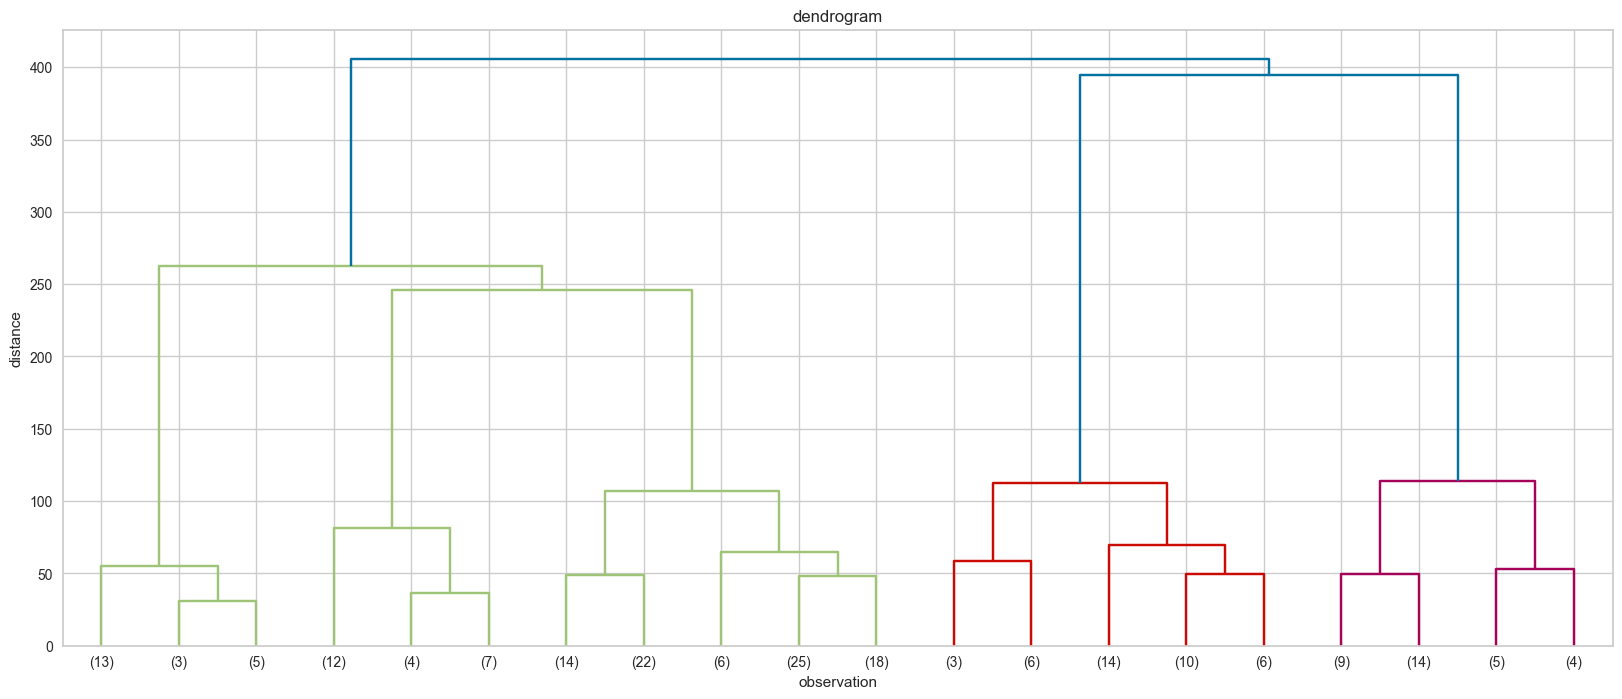

In [73]:
hc_ward = linkage (y= X2, method ="ward")

plt.figure(figsize= (20,8))
plt.title("dendrogram")
plt.xlabel("observation")
plt.ylabel("distance")
dendrogram (hc_ward, leaf_font_size=10, truncate_mode='lastp', p=20); 

 #### ii. *Apply Agglomerative Clustering* 

In [47]:
K= range (2,10)
for k in K:
    model =AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X2)
    print("f'Silhouette Score for",{k}, "clusters",{silhouette_score(X2, model.labels_)}) 

f'Silhouette Score for {2} clusters {0.36706444723912895}
f'Silhouette Score for {3} clusters {0.4618340266628975}
f'Silhouette Score for {4} clusters {0.4916598193892782}
f'Silhouette Score for {5} clusters {0.5529945955148897}
f'Silhouette Score for {6} clusters {0.5380208285578872}
f'Silhouette Score for {7} clusters {0.519904611908887}
f'Silhouette Score for {8} clusters {0.4326286245782246}
f'Silhouette Score for {9} clusters {0.43892545672004507}


In [52]:
model5 =  AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage = "ward") 
labels_agglomerative = model5.fit_predict(X2)  

####  *Visualizing and Labeling All the Clusters* 

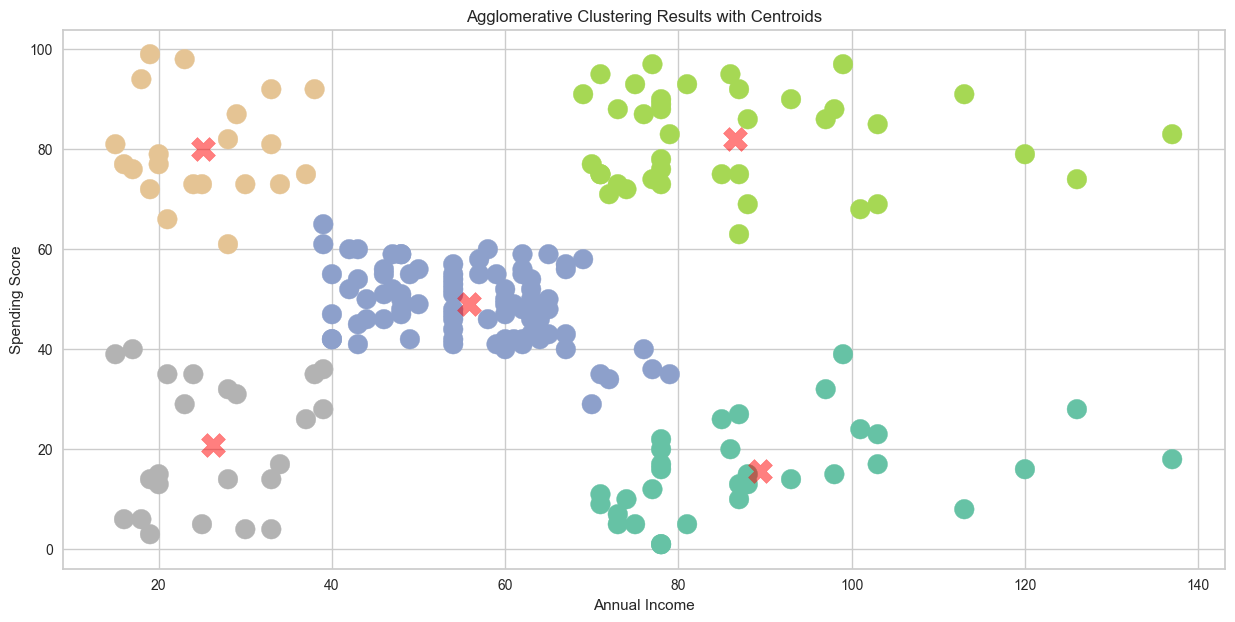

In [53]:
plt.figure(1, figsize=(15, 7))
plt.clf()

# Scatter plot for data points
scatter = plt.scatter(x=X2[:, 0], y=X2[:, 1], c=labels_agglomerative, cmap=plt.cm.Set2, s=200)

# Calculate centroids on-the-fly
centroids_agglomerative = np.array([X2[labels_agglomerative == i].mean(axis=0) for i in range(model5.n_clusters)])

# Plot centroids
plt.scatter(x=centroids_agglomerative[:, 0], y=centroids_agglomerative[:, 1], s=300, c='red', alpha=0.5, marker='X')

plt.title('Agglomerative Clustering Results with Centroids')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show() 

## Conclusion

We have Mall customer data to cluster them according to their Age, Annual Income, and Spending Score. 

We get the first insight into five different customer segments using visualization tools. 

Before modeling,  we used Hopkins Statistics to understand if our data was suitable for clustering. We got a 0.16 score, which shows that the data is not uniformly distributed. Clustering can be useful to classify the observations. 

We build two relations based on the Spending Score; the first variable is Age, and the second one is Annual Income. We consider these two relations, 'Age-Spending Score' and 'Annual Income and Spending Score', for clustering our customers.
 
We separately determine the optimal number of clusters using the elbow method, Silhouette Score, for K-means modeling for these two data sets. 
We got 4 clusters for the 'Age - Spending Score' data set and 5 clusters for the 'Annual Income - Spending Score' data set according to the Elbow method and  Silhouette Score. 

The k-Means model made good predictions for our clusters as Customer Segments. We also showed our predicted clusters using plotting. 

We also used a dendrogram to determine an optimal number of clusters, but dendrogram clusters were incompatible with Silhouette scores. So, we disregarded the Dendogram results for agglomerative clustering. 

In conclusion, to cluster our customers in different segments, 'Annual Income and Spending Score' gives better results. 



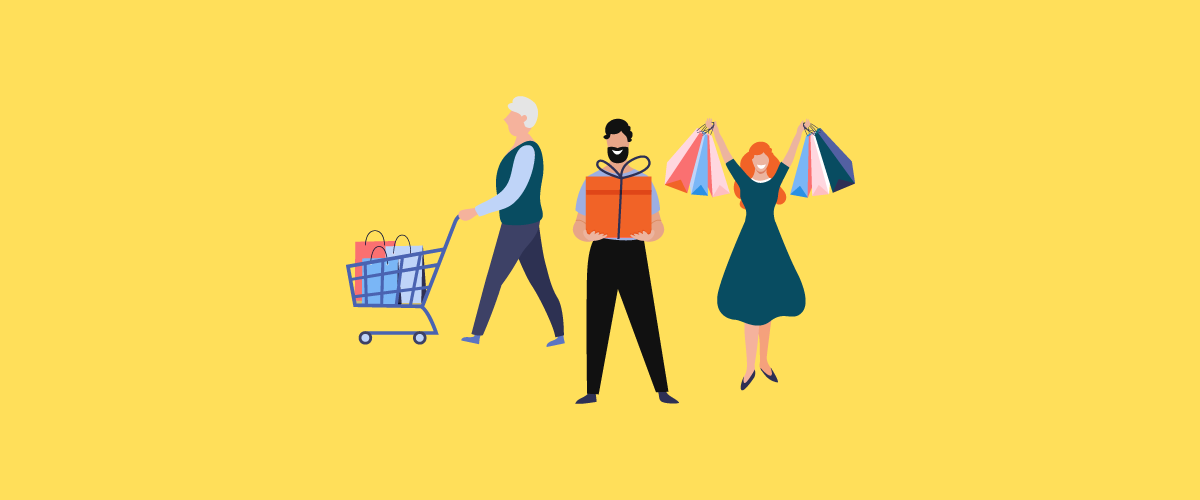